## Explore the creation of synthetic waves

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
from src.wave_generator import WaveGenerator
import numpy as np 
import os

### Examples

#### Generate time series

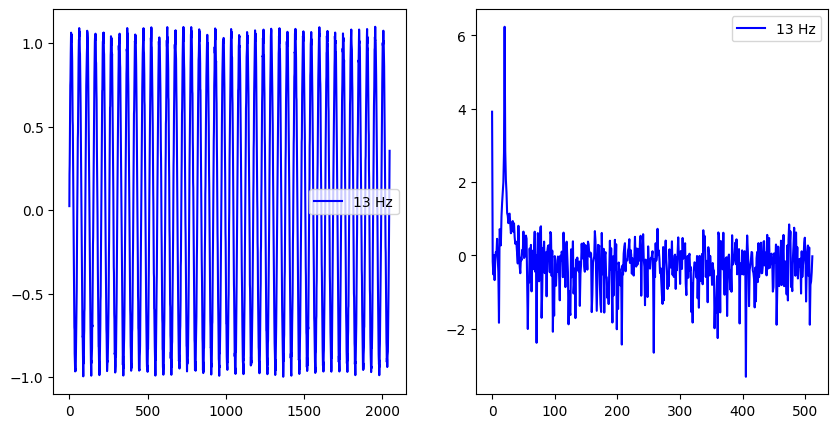

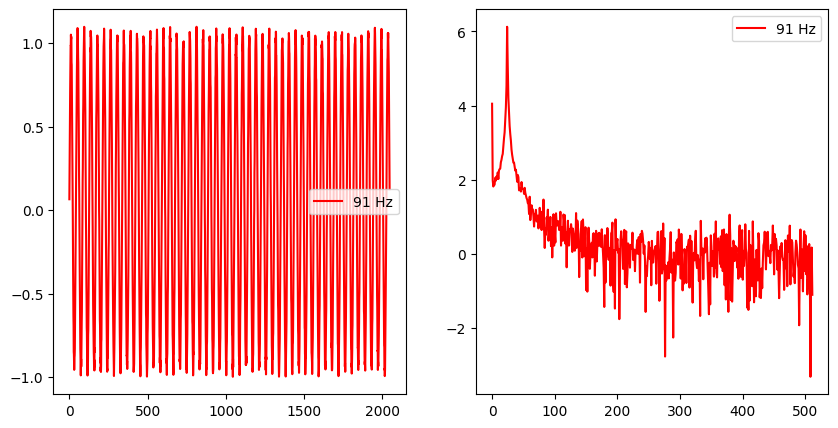

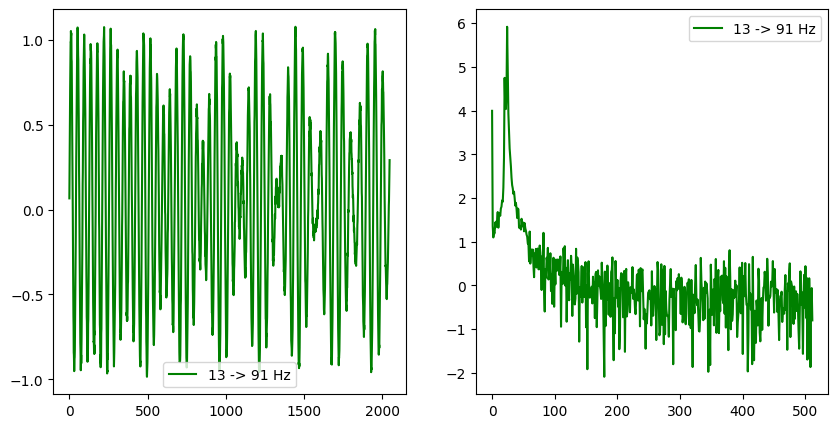

In [44]:
wg = WaveGenerator()

two_pi = 2*np.pi
time_serie_1 = wg.generate_time_series(angular_frequency=two_pi*313)
time_serie_2 = wg.generate_time_series(angular_frequency=two_pi*379)
time_serie_3 = wg.mixing_time_series(first_time_series=time_serie_1, second_time_series=time_serie_2)

wg.plot_wave(time_serie_1, label_hz='13 Hz')
wg.plot_wave(time_serie_2, label_hz='91 Hz', color='r')
wg.plot_wave(time_serie_3, label_hz='13 -> 91 Hz', color='g')


#### Plot function

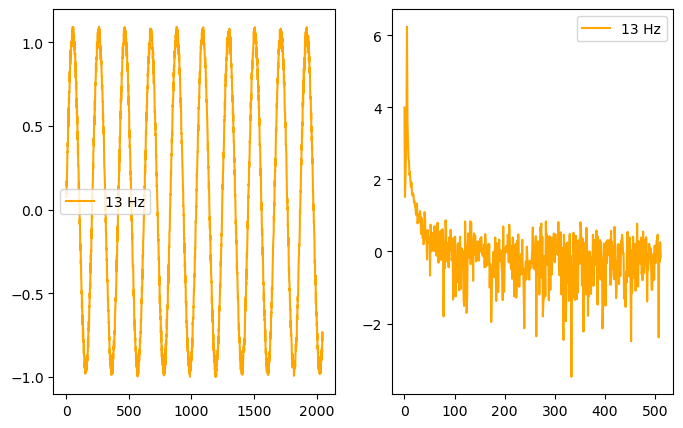

In [7]:
t = np.linspace(0, 10, 160000)
s1 = np.sin(2*np.pi*77*t) + 0.1*np.random.rand(len(t))

wg = WaveGenerator()
wg.plot_wave(serie=s1, color='orange', label_hz='13 Hz')


#### Generate .wav file


In [43]:
if not os.path.exists('machine_test'):
    os.mkdir('machine_test')

wg = WaveGenerator()
t = np.linspace(0, 100, 1600000)

toy_serie = np.sin(2*np.pi*256*t) + 0.1*np.random.rand(len(t))
wg.generate_wav_file(file_name = 'toy', folder_name='machine_test/normal',serie = toy_serie , sampling_rate = 16000)
wg.generate_wav_file(file_name = 'toy', folder_name='machine_test/abnormal',serie = toy_serie , sampling_rate = 16000, amount=3)

### Generate Synthetic Waves for models

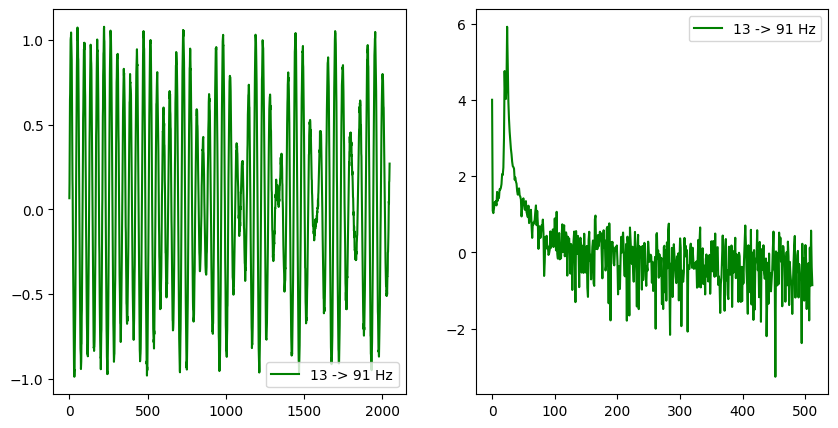

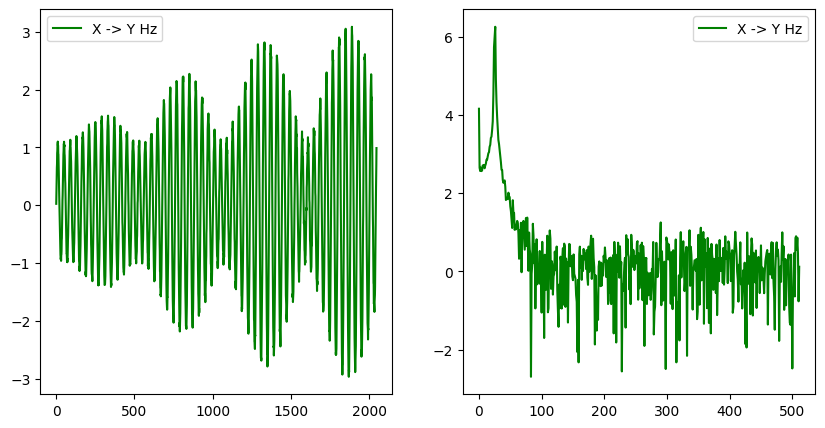

In [68]:
wg = WaveGenerator(data_number=1600000, stop=100)

two_pi = 2*np.pi
time_serie_1 = wg.generate_time_series(angular_frequency=two_pi*313)
time_serie_2 = wg.generate_time_series(angular_frequency=two_pi*379)
normal_time_serie= wg.mixing_time_series(first_time_series=time_serie_1, second_time_series=time_serie_2)

wg.plot_wave(normal_time_serie, label_hz='13 -> 91 Hz', color='g')

three_pi = -4*np.pi
time_serie_1 = wg.generate_time_series(angular_frequency=two_pi*370)
time_serie_2 = wg.generate_time_series(angular_frequency=two_pi*400)
abormal_time_serie= wg.mixing_time_series(first_time_series=time_serie_1, second_time_series=time_serie_2, coeficient_pi=three_pi)
wg.plot_wave(abormal_time_serie, label_hz='X -> Y Hz', color='g')

if not os.path.exists('SyntheticMachine'):
    os.mkdir('SyntheticMachine')

if not os.path.exists('SyntheticMachine/id_00'):
    os.mkdir('SyntheticMachine/id_00')

wg.generate_wav_file(file_name = 'sound', folder_name='SyntheticMachine/id_00/normal',serie = normal_time_serie , sampling_rate = 16000, amount=10)
wg.generate_wav_file(file_name = 'sound', folder_name='SyntheticMachine/id_00/abnormal',serie = abormal_time_serie , sampling_rate = 16000, amount=4)